In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load data
bank_info = pd.read_csv('bank-additional-full.csv', delimiter=";")
bank_info.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
age = bank_info.age
duration = bank_info.duration
call_time = bank_info.campaign
prev_contact = bank_info.previous
euribor3m = bank_info.euribor3m

In [4]:
j = bank_info.job
job = pd.get_dummies(j)

In [5]:
pd.options.mode.chained_assignment = None

In [6]:
m = bank_info.marital
m[(m == 'divorced')|(m == 'married')].loc[:]= 'married_current_or_before'
m[(m == 'single') | (m == 'unknown')].loc[:] = 'not_married'
marital = pd.get_dummies(m)

In [7]:
e = bank_info.education
e[(e == 'illiterate')|(e == 'basic.4y')|(e == 'basic.6y')|(e == 'basic.9y')]= 'high_school_below'
e[(e == 'university.degree')|(e == 'professional.course')|(e == 'unknown')] = 'high_school_above'
education = pd.get_dummies(e)

In [8]:
contact = pd.get_dummies(bank_info.contact)

In [9]:
ne = bank_info['nr.employed']
ne[(ne == 4963.6)|(ne == 4991.6)|(ne == 5008.7)|(ne == 5017.5)|(ne == 5023.5)|(ne == 5076.2)] = '5099_below'
ne[(ne == 5176.3)|(ne == 5191.0)|(ne == 5195.8)|(ne == 5228.1)] = '5100_above'
number_employed = pd.get_dummies(ne)

In [10]:
month = pd.get_dummies(bank_info.month)

In [11]:
day_of_week = pd.get_dummies(bank_info.day_of_week)

In [12]:
p = bank_info.pdays
p[p != 999] = '0-27'
last_contact = pd.get_dummies(p)

In [13]:
prev_outcome = pd.get_dummies(bank_info.poutcome)

In [14]:
emp_var_rate = pd.get_dummies(bank_info['emp.var.rate'])
cons_price_idx  = pd.get_dummies(bank_info['cons.price.idx'])
cons_conf_idx = pd.get_dummies(bank_info['cons.conf.idx'])

In [15]:
hou_loan = pd.get_dummies(bank_info.housing)
per_loan = pd.get_dummies(bank_info.loan)
default = pd.get_dummies(bank_info.default)

In [16]:
output = pd.get_dummies(bank_info.y).yes

In [17]:
data = pd.concat([age, job, marital, education, default, hou_loan, per_loan, contact, month, 
                  duration, call_time, day_of_week, last_contact, prev_contact, prev_outcome, 
                  emp_var_rate, cons_price_idx, cons_conf_idx, number_employed, euribor3m, output], axis=1)
pd.set_option('display.max_columns', None)
data.head()

,age,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single,unknown,high.school,high_school_above,high_school_below,no,unknown,yes,no,unknown,yes,no,unknown,yes,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,duration,campaign,fri,mon,thu,tue,wed,999,0-27,previous,failure,nonexistent,success,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4,92.20100000000001,92.37899999999999,92.431,92.469,92.649,92.713,92.756,92.84299999999999,92.89299999999999,92.963,93.075,93.2,93.369,93.444,93.749,93.79799999999999,93.876,93.91799999999999,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.76700000000001,-50.8,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,-40.4,-40.3,-40.0,-39.8,-38.3,-37.5,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9,5099.1,5099_below,5100_above,euribor3m,yes
0,56,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,261,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.857,0
1,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,149,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.857,0
2,37,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,226,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.857,0
3,40,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,151,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.857,0
4,56,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,307,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4.857,0


In [27]:
data=np.array(data)
n = data.shape[0]
d = data.shape[1]
d -= 1
n_train = int(n*0.7)
n_test = int(n*0.2)
n_validate  = n - n_train - n_test
data = np.random.permutation(data)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
X_validate = np.zeros((n_validate,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))
Y_validate = np.zeros((n_validate))

X_train[:] = data[:n_train,:-1]
Y_train[:] = data[:n_train,-1]

X_test[:] = data[n_train:(n_train+n_test),:-1]
Y_test[:] = data[n_train:(n_train+n_test),-1]

X_validate[:] = data[(n_train+n_test):, :-1]
Y_validate[:] = data[(n_train+n_test):,-1]

print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_validate.shape)

(28831, 120)
(8237, 120)
(4120, 120)
(28831,)
(8237,)
(4120,)


In [52]:
number = np.array(range(0,28831))
number

array([    0,     1,     2, ..., 28828, 28829, 28830])

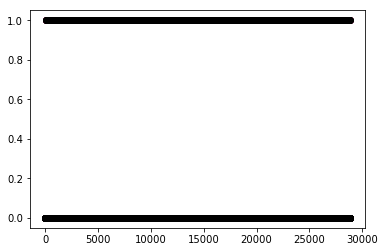

In [55]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
plt.plot(number, Y_train, 'o', color ='hotpink')
plt.plot(number, model1.predict(X_train), 'o', color ='black')

In [34]:
print(model1.score(X_test, Y_test))

0.912225324754
